<a href="https://colab.research.google.com/github/ovplgn/Kaggle/blob/main/Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# Визуализация

In [5]:
df.head(1)

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2,12.0,1.51,2.42,22.0,86,1.45,1.25,0.5,1.63,3.6,1.05,2.65,450


In [7]:
test.head(1)

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,12.93,2.81,2.7,21.0,96,1.54,0.5,0.53,0.75,4.6,0.77,2.31,600


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target                        106 non-null    int64  
 1   Alcohol                       106 non-null    float64
 2   Malic acid                    106 non-null    float64
 3   Ash                           106 non-null    float64
 4   Alcalinity of ash             106 non-null    float64
 5   Magnesium                     106 non-null    int64  
 6   Total phenols                 106 non-null    float64
 7   Flavanoids                    106 non-null    float64
 8   Nonflavanoid phenols          106 non-null    float64
 9   Proanthocyanins               106 non-null    float64
 10  Color intensity               106 non-null    float64
 11  Hue                           106 non-null    float64
 12  OD280/OD315 of diluted wines  106 non-null    float64
 13  Proli

In [9]:
df.describe()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,1.943396,13.029811,2.291415,2.368208,19.504717,99.443396,2.301792,2.061698,0.371321,1.552736,5.073113,0.959528,2.560189,750.094340
std,0.778646,0.785409,1.100220,0.291125,3.251326,13.556288,0.648880,1.052261,0.120175,0.570947,2.144533,0.221615,0.702592,329.871852
min,1.000000,11.410000,0.740000,1.700000,11.400000,78.000000,0.980000,0.340000,0.140000,0.410000,1.280000,0.480000,1.270000,312.000000
25%,1.000000,12.370000,1.530000,2.192500,17.275000,88.000000,1.727500,1.130000,0.270000,1.110000,3.362500,0.792500,1.877500,496.250000
50%,2.000000,13.060000,1.830000,2.360000,19.500000,98.000000,2.340000,2.105000,0.370000,1.550000,4.790000,0.980000,2.755000,666.000000
75%,3.000000,13.660000,3.012500,2.557500,21.375000,107.000000,2.845000,2.955000,0.450000,1.915000,6.175000,1.120000,3.072500,981.250000
max,3.000000,14.750000,5.800000,3.230000,30.000000,139.000000,3.880000,5.080000,0.630000,3.580000,10.800000,1.450000,3.920000,1680.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         72 non-null     int64  
 1   Alcohol                       72 non-null     float64
 2   Malic acid                    72 non-null     float64
 3   Ash                           72 non-null     float64
 4   Alcalinity of ash             72 non-null     float64
 5   Magnesium                     72 non-null     int64  
 6   Total phenols                 72 non-null     float64
 7   Flavanoids                    72 non-null     float64
 8   Nonflavanoid phenols          72 non-null     float64
 9   Proanthocyanins               72 non-null     float64
 10  Color intensity               72 non-null     float64
 11  Hue                           72 non-null     float64
 12  OD280/OD315 of diluted wines  72 non-null     float64
 13  Proline

In [11]:
test.describe()

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,36.50000,12.957639,2.402500,2.364028,19.480556,100.180556,2.285278,1.981528,0.347917,1.647083,5.035972,0.954389,2.687500,742.180556
std,20.92845,0.852996,1.146143,0.249561,3.488478,15.376337,0.594666,0.919728,0.130091,0.573778,2.568282,0.239993,0.718925,293.694357
min,1.00000,11.030000,0.920000,1.360000,10.600000,70.000000,1.100000,0.470000,0.130000,0.420000,1.740000,0.550000,1.290000,278.000000
25%,18.75000,12.280000,1.647500,2.235000,17.075000,89.750000,1.770000,1.215000,0.260000,1.332500,2.800000,0.780000,1.990000,518.750000
50%,36.50000,12.930000,1.885000,2.340000,19.250000,97.500000,2.380000,2.135000,0.320000,1.555000,4.650000,0.960000,2.920000,680.000000
75%,54.25000,13.710000,3.135000,2.530000,21.700000,107.250000,2.725000,2.782500,0.430000,1.982500,6.212500,1.112500,3.265000,1020.000000
max,72.00000,14.830000,5.650000,2.860000,28.500000,162.000000,3.850000,3.560000,0.660000,3.280000,13.000000,1.710000,4.000000,1480.000000


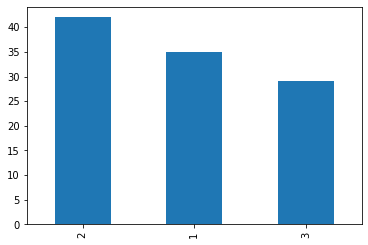

In [13]:

df['Target'].value_counts().plot(kind='bar')
plt.show()

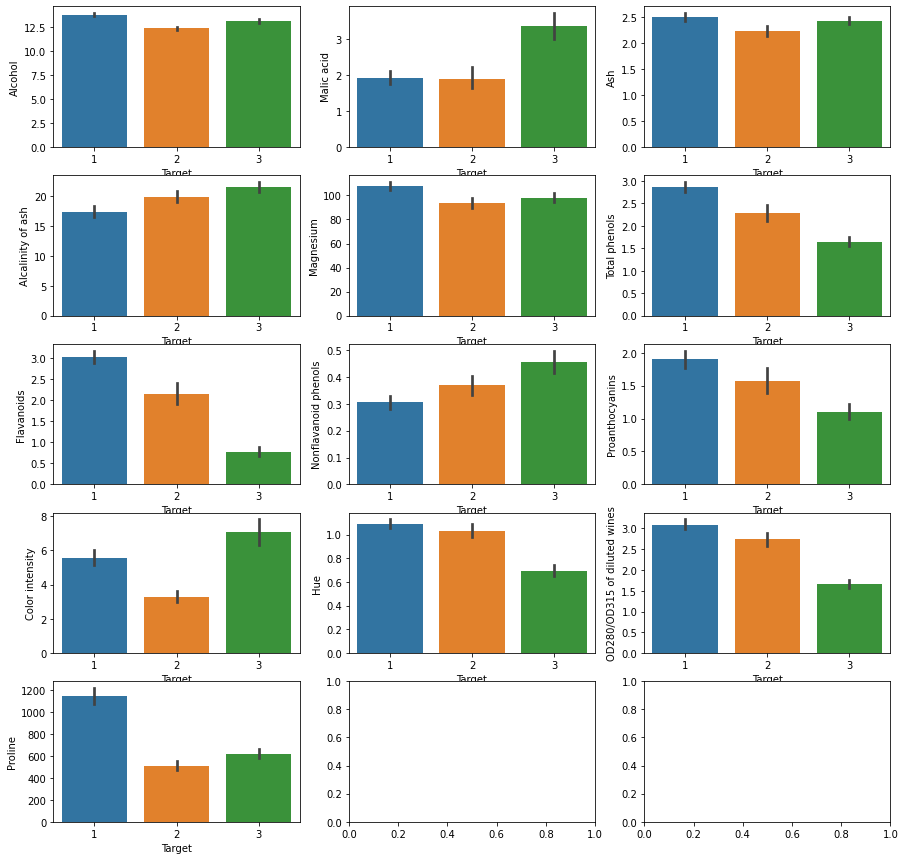

In [22]:
fig, ax = plt.subplots(5,3, figsize = (15,15)) 

sns.barplot(data = df, y ="Alcohol", x="Target", ax=ax[0,0]);
sns.barplot(data = df, y ="Malic acid", x="Target", ax=ax[0,1]);
sns.barplot(data = df, y ="Ash", x="Target", ax=ax[0,2]);
sns.barplot(data = df, y ="Alcalinity of ash", x="Target", ax=ax[1,0]);
sns.barplot(data = df, y ="Magnesium", x="Target", ax=ax[1,1]);
sns.barplot(data = df, y ="Total phenols", x="Target", ax=ax[1,2]);
sns.barplot(data = df, y ="Flavanoids", x="Target", ax=ax[2,0]);
sns.barplot(data = df, y ="Nonflavanoid phenols", x="Target", ax=ax[2,1]);
sns.barplot(data = df, y ="Proanthocyanins", x="Target", ax=ax[2,2]);
sns.barplot(data = df, y ="Color intensity", x="Target", ax=ax[3,0]);
sns.barplot(data = df, y ="Hue", x="Target", ax=ax[3,1]);
sns.barplot(data = df, y ="OD280/OD315 of diluted wines", x="Target", ax=ax[3,2]);
sns.barplot(data = df, y ="Proline", x="Target", ax=ax[4,0]);

In [45]:
X = df.drop('Target',axis=1).values
y = df.Target.values


In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=0)

In [63]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# KNN


In [70]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [3 3]
 [1 1]
 [2 3]]


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) #хорошо

[[14  0  0]
 [ 1 15  0]
 [ 0  1 12]]


0.9534883720930233

# SVC - ~97-98%

In [73]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [74]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier

[[2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [3 3]
 [1 1]
 [2 3]]


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) #отлично

[[14  0  0]
 [ 0 16  0]
 [ 0  1 12]]


0.9767441860465116

# Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [94]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [2 3]
 [1 1]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [2 2]
 [2 2]
 [2 1]
 [2 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 1]
 [3 3]
 [1 1]
 [2 2]
 [3 2]
 [2 2]
 [1 1]
 [2 2]
 [2 3]
 [1 1]
 [3 3]]


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
accuracy_score(y_test, y_pred) #не особо

[[11  3  0]
 [ 1 13  2]
 [ 0  3 10]]


0.7906976744186046

# Регрессия

In [97]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg = reg.fit(X_train,y_train)

In [98]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [2 3]
 [1 1]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [2 2]
 [2 2]
 [2 1]
 [2 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 1]
 [3 3]
 [1 1]
 [2 2]
 [3 2]
 [2 2]
 [1 1]
 [2 2]
 [2 3]
 [1 1]
 [3 3]]


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
accuracy_score(y_test, y_pred) #не особо

[[11  3  0]
 [ 1 13  2]
 [ 0  3 10]]


0.7906976744186046

# Вывод

In [77]:
solution = test.drop('index',axis=1)
solution = sc.fit_transform(solution)

In [79]:
final_pred = final_classifier.predict(solution)
final_pred

array([3, 3, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 3, 2,
       2, 2, 1, 2, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 1, 3, 3, 1, 2, 1, 3, 1,
       2, 2, 2, 2, 3, 3, 1, 3, 2, 1, 3, 2, 2, 2, 1, 2, 1, 3, 3, 3, 3, 2,
       1, 1, 2, 1, 3, 2])

In [85]:
output = pd.DataFrame({'index':test.index+1,'Target':final_pred})
output.to_csv('output.csv', index=False)
filename = "output.csv"